<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_SeriesTemporais_RandomForest_sele%C3%A7%C3%A3oAtributos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']  =15,8


In [3]:
d= pd.read_csv('/content/AirPassengers.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
d

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [6]:
differenced = d.diff(12)
differenced.head(n=13)

Month
1949-01-01    NaN
1949-02-01    NaN
1949-03-01    NaN
1949-04-01    NaN
1949-05-01    NaN
1949-06-01    NaN
1949-07-01    NaN
1949-08-01    NaN
1949-09-01    NaN
1949-10-01    NaN
1949-11-01    NaN
1949-12-01    NaN
1950-01-01    3.0
Name: #Passengers, dtype: float64

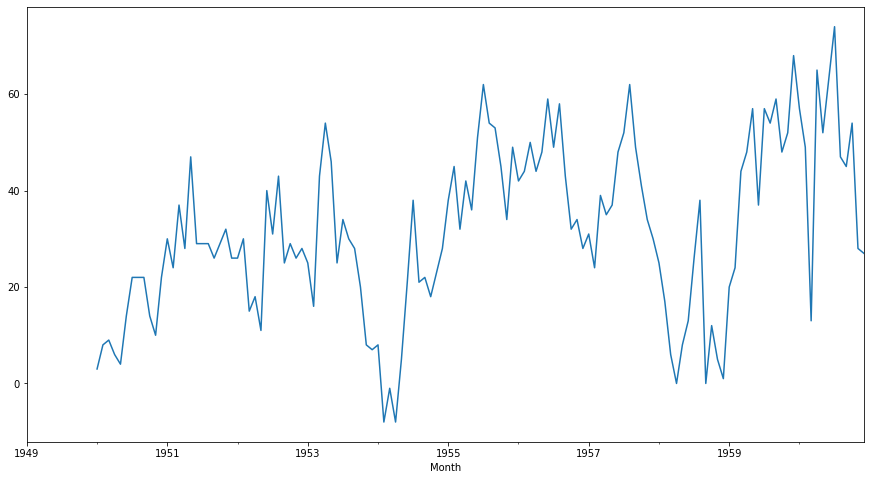

In [10]:
differenced.plot()
plt.show()


In [13]:
differenced = differenced[12:] #sem valores nulos

In [15]:
differenced.head(n=13)

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
Name: #Passengers, dtype: float64

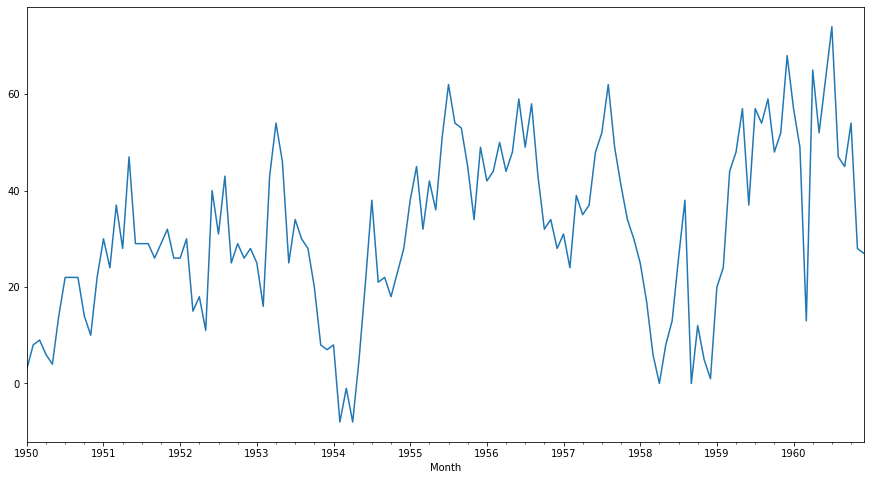

In [16]:
differenced.plot()
plt.show()

In [19]:
df = pd.DataFrame()
for i in range(12,0,-1):
  df['t-'+str(i)] = differenced.shift(i)
  df['t'] = differenced.values

print(df.head(13))
df = df[13:]

            t-12     t  t-11  t-10  t-9  t-8   t-7   t-6   t-5   t-4   t-3  \
Month                                                                        
1950-01-01   NaN   3.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01   NaN   8.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01   NaN   9.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-04-01   NaN   6.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   3.0   
1950-05-01   NaN   4.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   3.0   8.0   
1950-06-01   NaN  14.0   NaN   NaN  NaN  NaN   NaN   NaN   3.0   8.0   9.0   
1950-07-01   NaN  22.0   NaN   NaN  NaN  NaN   NaN   3.0   8.0   9.0   6.0   
1950-08-01   NaN  22.0   NaN   NaN  NaN  NaN   3.0   8.0   9.0   6.0   4.0   
1950-09-01   NaN  22.0   NaN   NaN  NaN  3.0   8.0   9.0   6.0   4.0  14.0   
1950-10-01   NaN  14.0   NaN   NaN  3.0  8.0   9.0   6.0   4.0  14.0  22.0   
1950-11-01   NaN  10.0   NaN   3.0  8.0  9.0   6.0   4.0  14.0  

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
array = df.values
x = array[:,0:-1]
y = array[:,-1]

In [22]:
modelo = RandomForestRegressor(n_estimators=500, random_state=1)

In [23]:
modelo.fit(x, y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [24]:
modelo.feature_importances_

array([0.0249511 , 0.37561103, 0.01541998, 0.0167022 , 0.01435688,
       0.02521651, 0.02093459, 0.02271564, 0.02462942, 0.05339896,
       0.12840096, 0.27766272])

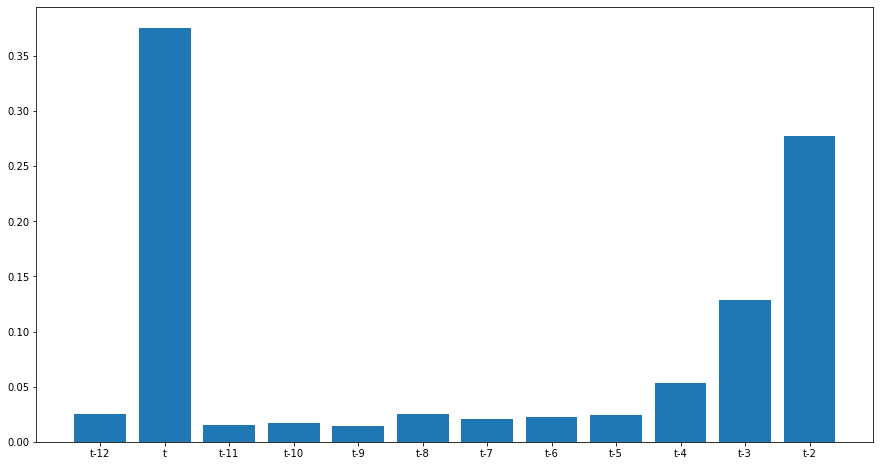

In [26]:
nomes = df.columns.values[0:-1]
ticks = [ i for i in range(len(nomes))]
plt.bar(ticks, modelo.feature_importances_)
plt.xticks(ticks, nomes)
plt.show()

In [27]:
from sklearn.feature_selection import RFE

In [31]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1))
fit = rfe.fit(x,y)

In [33]:
nomes = df.columns.values[0:-1]
for i in range(len(fit.support_)):
  if fit.support_[i]:
    print(nomes[i])

t
t-8
t-5
t-4
t-3
t-2
